In [14]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split


### Gradient boost guided example

Having walked through gradient boost by hand, now let's try it with SKlearn.  We'll still use the European Social Survey Data, but now with a categorical outcome: Whether or not someone lives with a partner.

In [15]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()


# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

# # Create training and test sets.
# offset = int(X.shape[0] * 0.9)

# # Put 90% of the data in the training set.
# X_train, y_train = X[:offset], y[:offset]

# # And put 10% in the test set.
# X_test, y_test = X[offset:], y[offset:]

Since we're now working with a binary outcome, we've switched to a classifier.  Now our loss function can't be the residuals.  Our options are "deviance", or "exponential".  Deviance is used for logistic regression, and we'll try that here.

In [16]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}
run_desc = 'baseline'


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Run description: {}\n\n'
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(run_desc, train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

results_df = pd.DataFrame(columns = ['params', 'train_type1', 'train_type2', 'test_type1', 'test_type2'])
new_results = {'params': params, 'run_desc' : run_desc, 'train_type1': train_tI_errors, 'train_type2': train_tII_errors, 'test_type1': test_tI_errors, 'test_type2': test_tII_errors}
results_df = results_df.append(new_results, ignore_index=True)

Run description: baseline

Training set accuracy:
Percent Type I errors: 0.04603345097437471
Percent Type II errors: 0.1752340033757864

Test set accuracy:
Percent Type I errors: 0.05214723926380368
Percent Type II errors: 0.20368098159509201


Unlike decision trees, gradient boost solutions are not terribly easy to interpret on the surface.  But they aren't quite a black box.  We can get a measure of how important various features are by counting how many times a feature is used over the course of many decision trees.

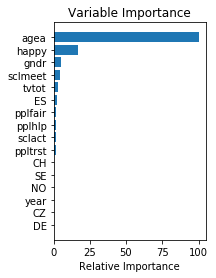

In [17]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

It appears that age and happiness are the most important features in predicting whether or not someone lives with a partner.

### DRILL: Improve this gradient boost model

While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement.  Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set.  Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

Have fun!

### Robin's work

"Try a different loss function": There are only two choices among the parameters for GradientBoostingClassifier. The choices are the default, 'deviance', and 'exponential'. The documentation says, " For loss ‘exponential’ gradient boosting recovers the AdaBoost algorithm.". I don't understand what the reference to 'AdaBoost' means.


In [18]:
 # We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'exponential'}
run_desc = 'chg loss function'

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Run description: {}\n\n'
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(run_desc, train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

new_results = {'params': params, 'run_desc': run_desc, 'train_type1': train_tI_errors, 'train_type2': train_tII_errors, 'test_type1': test_tI_errors, 'test_type2': test_tII_errors}
results_df = results_df.append(new_results, ignore_index=True)

Run description: chg loss function

Training set accuracy:
Percent Type I errors: 0.0469541199938622
Percent Type II errors: 0.17600122755869266

Test set accuracy:
Percent Type I errors: 0.05214723926380368
Percent Type II errors: 0.19938650306748465


#### Changing the loss function results in slightly higher error rates in the test set as compared to the baseline.

Now try increasing the depth.

In [19]:
 # We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance'}
run_desc = 'incr depth'

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Run description: {}\n\n'
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(run_desc, train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

new_results = {'params': params, 'run_desc': run_desc, 'train_type1': train_tI_errors, 'train_type2': train_tII_errors, 'test_type1': test_tI_errors, 'test_type2': test_tII_errors}
results_df = results_df.append(new_results, ignore_index=True)

Run description: incr depth

Training set accuracy:
Percent Type I errors: 0.020101273592143625
Percent Type II errors: 0.1126285100506368

Test set accuracy:
Percent Type I errors: 0.06993865030674846
Percent Type II errors: 0.19386503067484662


#### When increasing the depth, Type I errors in the test set go up by about 2/10 of a percent but Type II errors go down by ~ half a percent

 "Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance."
 Try increasing the number of estimators.

In [20]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 750,
          'max_depth': 2,
          'loss': 'deviance'}
run_desc = 'incr num estimators'

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Run description: {}\n\n'
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(run_desc, train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

new_results = {'params': params, 'run_desc': run_desc, 'train_type1': train_tI_errors, 'train_type2': train_tII_errors, 'test_type1': test_tI_errors, 'test_type2': test_tII_errors}
results_df = results_df.append(new_results, ignore_index=True)

Run description: incr num estimators

Training set accuracy:
Percent Type I errors: 0.04541967162804972
Percent Type II errors: 0.1704772134417677

Test set accuracy:
Percent Type I errors: 0.05460122699386503
Percent Type II errors: 0.20122699386503068


#### Increasing estimators by one-half: ~ 1/2 percent increase in Type I errors, ~ 1/2 percent decrease in Type II errors in test set

Try sub-sampling

In [21]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
         'subsample': 0.8}
run_desc = 'use subsample 0.8'

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Run description: {}\n\n'
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(run_desc, train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

new_results = {'params': params, 'run_desc': run_desc, 'train_type1': train_tI_errors, 'train_type2': train_tII_errors, 'test_type1': test_tI_errors, 'test_type2': test_tII_errors}
results_df = results_df.append(new_results, ignore_index=True)

Run description: use subsample 0.8

Training set accuracy:
Percent Type I errors: 0.04664723032069971
Percent Type II errors: 0.17093754795151142

Test set accuracy:
Percent Type I errors: 0.05521472392638037
Percent Type II errors: 0.19754601226993865


In [27]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
         'subsample': 0.90}
run_desc = 'use subsample 0.90'

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Run description: {}\n\n'
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(run_desc, train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

new_results = {'params': params, 'run_desc': run_desc, 'train_type1': train_tI_errors, 'train_type2': train_tII_errors, 'test_type1': test_tI_errors, 'test_type2': test_tII_errors}
results_df = results_df.append(new_results, ignore_index=True)

Run description: use subsample 0.90

Training set accuracy:
Percent Type I errors: 0.0475678993401872
Percent Type II errors: 0.1698634340954427

Test set accuracy:
Percent Type I errors: 0.05337423312883435
Percent Type II errors: 0.19570552147239265


In [29]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 4,
          'loss': 'deviance',
         'subsample': 0.70}
run_desc = 'incr depth and subsample 0.70'

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Run description: {}\n\n'
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(run_desc, train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

new_results = {'params': params, 'run_desc': run_desc, 'train_type1': train_tI_errors, 'train_type2': train_tII_errors, 'test_type1': test_tI_errors, 'test_type2': test_tII_errors}
results_df = results_df.append(new_results, ignore_index=True)

Run description: incr depth and subsample 0.70

Training set accuracy:
Percent Type I errors: 0.02071505293846862
Percent Type II errors: 0.09958569894123062

Test set accuracy:
Percent Type I errors: 0.06809815950920245
Percent Type II errors: 0.18773006134969325


In [33]:
print(results_df)

                                              params  train_type1  \
0  {'n_estimators': 500, 'max_depth': 2, 'loss': ...     0.046033   
1  {'n_estimators': 500, 'max_depth': 2, 'loss': ...     0.046954   
2  {'n_estimators': 500, 'max_depth': 4, 'loss': ...     0.020101   
3  {'n_estimators': 750, 'max_depth': 2, 'loss': ...     0.045420   
4  {'n_estimators': 500, 'max_depth': 2, 'loss': ...     0.046647   
5  {'n_estimators': 500, 'max_depth': 2, 'loss': ...     0.048182   
7  {'n_estimators': 500, 'max_depth': 2, 'loss': ...     0.047568   
8  {'n_estimators': 500, 'max_depth': 4, 'loss': ...     0.020715   

   train_type2  test_type1  test_type2                       run_desc  
0     0.175234    0.052147    0.203681                       baseline  
1     0.176001    0.052147    0.199387              chg loss function  
2     0.112629    0.069939    0.193865                     incr depth  
3     0.170477    0.054601    0.201227            incr num estimators  
4     0.170938    

### After experimenting with various parameters, I found that the following parameters produced the best results:
### Depth = 4 (2x the baseline) and subsample fraction of 0.70.